<a href="https://colab.research.google.com/github/Airenn/Hands-On-Machine-Learning/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
from sklearn.model_selection import train_test_split
assert sklearn.__version__ >= "0.20"


# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = os.path.join("drive","MyDrive","Hand_on_MachineLearning")
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**2.3.2 데이터 다운로드**

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("drive","MyDrive","Hand_on_MachineLearning","datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head() # 처음 다섯 행행

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info() # 전체 행, 데이터 타입, 널이 아닌 값 확인 메소드

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts() # 각 카테고리마다 값, 값의 개수 확인

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe() # 숫자형 Feature 요약 정보보

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


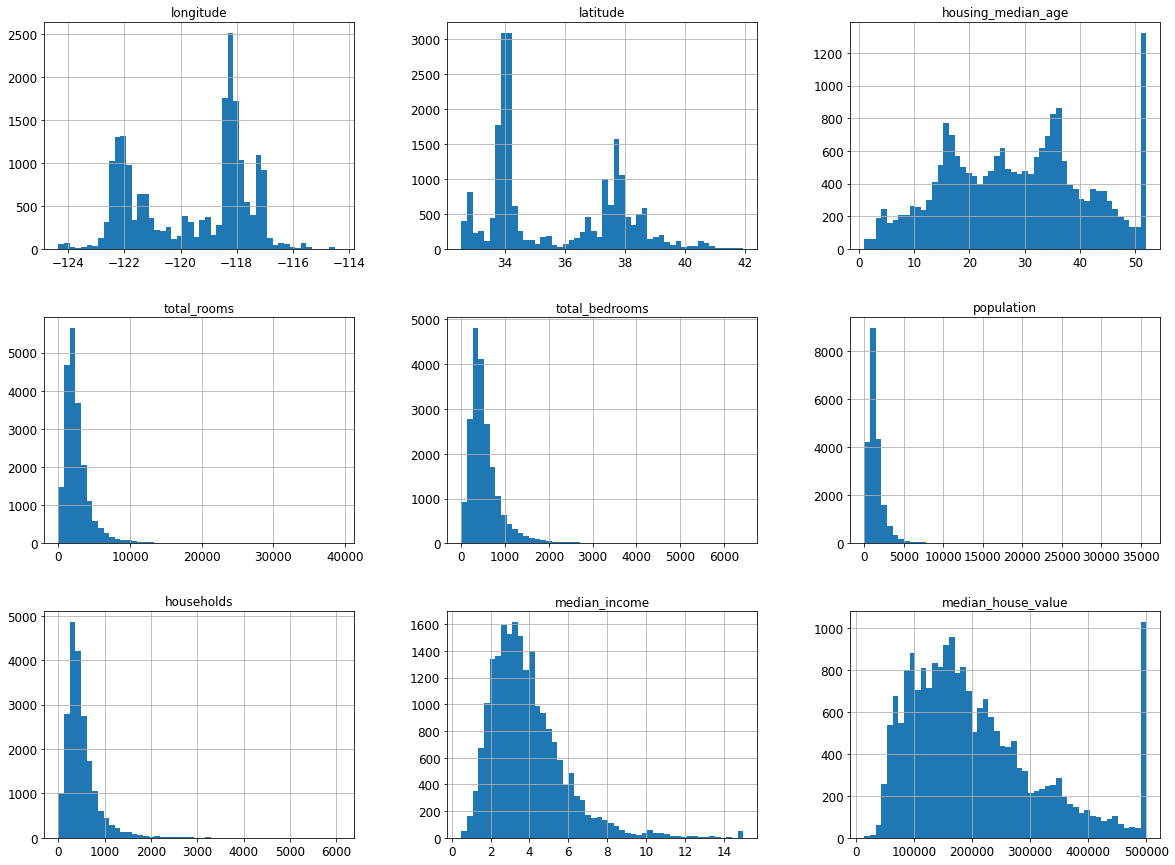

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

**2.3.4 테스트 세트 만들기**

**데이터 스누핑** : 테스트 세트로 일반화 오차를 추청하면 낙관적인 추정이 되어 시스템을 론칭했을 때 기대한 성능이 안 나오는 현상

In [10]:
np.random.seed(42)

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data)) # 무작위의 배열 생성
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  print(test_indices)
  train_indices = shuffled_indices[test_set_size:]
  print(train_indices)
  return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)
len(test_set)

[20046  3024 15663 ... 18086  2144  3665]
[14196  8267 17445 ...  5390   860 15795]


4128

In [13]:
# 샘플마다 식별자의 해시값을 계산하여 여러번 데이터셋이 갱신되더라도 테스트 세트 유지
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [15]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [16]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(test_set)


       index  longitude  ...  median_house_value  ocean_proximity
4          4    -122.25  ...            342200.0         NEAR BAY
5          5    -122.25  ...            269700.0         NEAR BAY
11        11    -122.26  ...            241800.0         NEAR BAY
20        20    -122.27  ...            147500.0         NEAR BAY
23        23    -122.27  ...             99700.0         NEAR BAY
...      ...        ...  ...                 ...              ...
20619  20619    -121.56  ...             99100.0           INLAND
20625  20625    -121.52  ...             72000.0           INLAND
20632  20632    -121.45  ...            115600.0           INLAND
20633  20633    -121.53  ...             98300.0           INLAND
20637  20637    -121.22  ...             92300.0           INLAND

[4278 rows x 11 columns]


In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
print(test_set)

       index  longitude  ...  ocean_proximity         id
8          8    -122.26  ...         NEAR BAY -122222.16
10        10    -122.26  ...         NEAR BAY -122222.15
11        11    -122.26  ...         NEAR BAY -122222.15
12        12    -122.26  ...         NEAR BAY -122222.15
13        13    -122.26  ...         NEAR BAY -122222.16
...      ...        ...  ...              ...        ...
20620  20620    -121.48  ...           INLAND -121440.95
20623  20623    -121.37  ...           INLAND -121330.97
20628  20628    -121.48  ...           INLAND -121440.90
20633  20633    -121.53  ...           INLAND -121490.81
20636  20636    -121.21  ...           INLAND -121170.51

[4373 rows x 12 columns]


In [18]:
test_set.head() # id가 서로 같음..

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


**계층적 샘플링(Stratified sampling)** : 전체에서 계층이라는 그룹으로 나누고 각 계층에서 올바른 수의 샘플을 추출

**무작위 추출을 사용하면 샘플링 편향이 생긴다 => 결과가 편향됨**

In [19]:
# 각 계층별로 충분한 샘플 수가 있어야 한다, 그렇지 않으면 계층 중요도를 추정하는데 편향이 생김

housing["income_cat"] = pd.cut(housing["median_income"], # pd.cut을 이용해 숫자형/연속형을 카테고리형으로 바꿀수 있다.
                               bins=[0, 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5,])

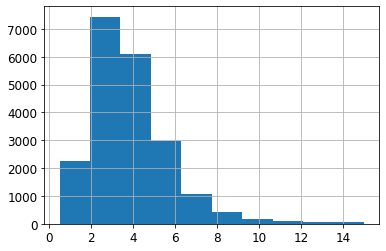

In [20]:
housing["median_income"].hist()

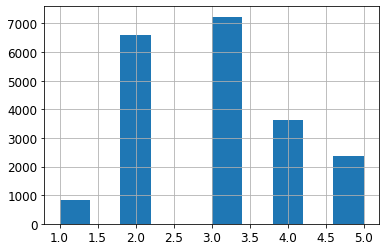

In [21]:
housing["income_cat"].hist()

In [22]:
# sklearn에서 계층적 샘플링 : StratifiedShuffleSplit : (StratifiedKfold + ShuffleSplit)
# StratifiedShuffleSplit은 그룹 고려한 분할이나 test셋에서 일부만 사용하기위한 복잡할 때 사용  
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [24]:
housing["income_cat"].value_counts() / len(housing)
# 원 데이터(hosuing)의 계층적 수입 항목과 테스트 셋의 계층적 수입 항목 비율이 비슷

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [25]:
st_train_set, st_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])
# train_test_split에 stratify으로 계층적 샘플링 가능

In [26]:
st_train_set["income_cat"].value_counts() / len(st_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [27]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "original": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "train_test_split": income_cat_proportions(test_set),
}).sort_index()
compare_props["train_test_split. %error"] = 100 * compare_props["train_test_split"] / compare_props["original"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["original"] - 100

In [28]:
compare_props

,original,Stratified,train_test_split,train_test_split. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [29]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

# **2.4 데이터 이해를 위한 탐색과 시각화**

In [30]:
housing = strat_train_set.copy()

**2.4.1 지리적 데이터 시각화**

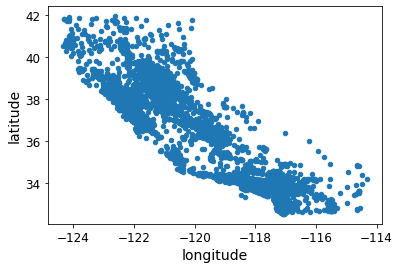

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude")

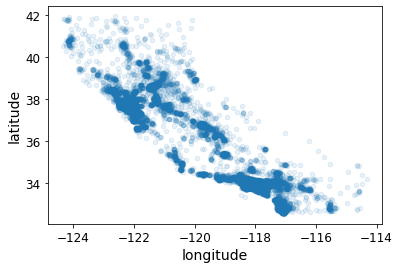

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# alpha = 1이면 완전 불투명, 0이면 완전 투명

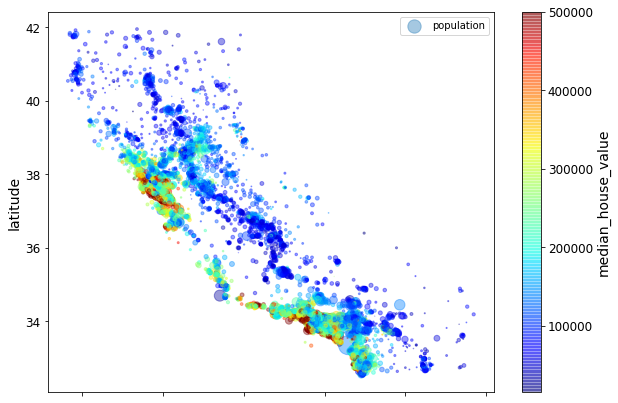

In [33]:
# 인구 : s, 가격 색상 : c, 가격 범위 : cmap
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"] / 100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()

In [34]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('drive/MyDrive/Hand_on_MachineLearning/images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f917f491c50>)

그림 저장: california_housing_prices_plot


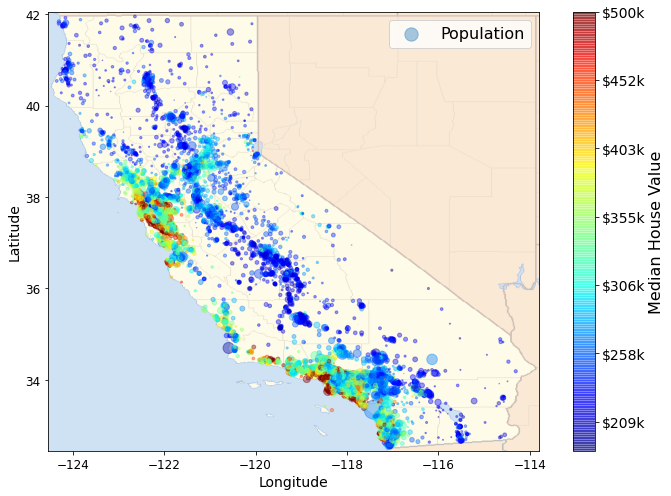

In [35]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

**2.4.2 상관관계 조사**

**표준 상관계수(standard corrleation coefficient) : 피어슨의 r이라고도 하며 특성간의 상관관계 표시**

                    longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.924478  ...      -0.019583           -0.047432
latitude            -0.924478  1.000000  ...      -0.075205           -0.142724
housing_median_age  -0.105848  0.005766  ...      -0.111360            0.114110
total_rooms          0.048871 -0.039184  ...       0.200087            0.135097
total_bedrooms       0.076598 -0.072419  ...      -0.009740            0.047689
population           0.108030 -0.115222  ...       0.002380           -0.026920
households           0.063070 -0.077647  ...       0.010781            0.064506
median_income       -0.019583 -0.075205  ...       1.000000            0.687160
median_house_value  -0.047432 -0.142724  ...       0.687160            1.000000

[9 rows x 9 columns]


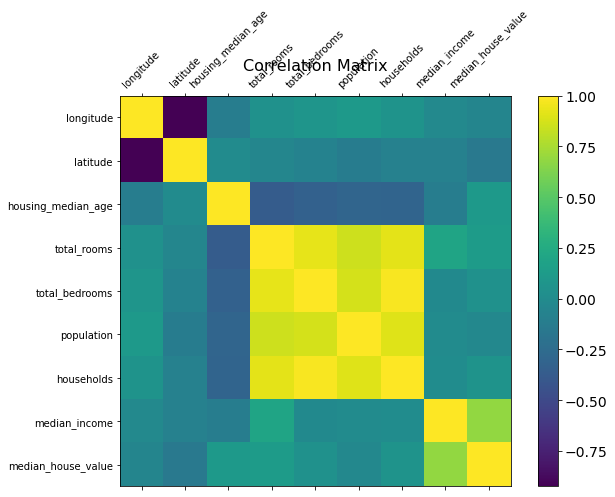

In [36]:
# corr()로 계산 가능
import matplotlib.pyplot as plt
corr_matrix = housing.corr()
print(corr_matrix)
f = plt.figure(figsize=(10, 7))
plt.matshow(housing.corr(), fignum=f.number)
plt.xticks(range(housing.select_dtypes(['number']).shape[1]), housing.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(housing.select_dtypes(['number']).shape[1]), housing.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [37]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

그림 저장: scatter_matrix_plot


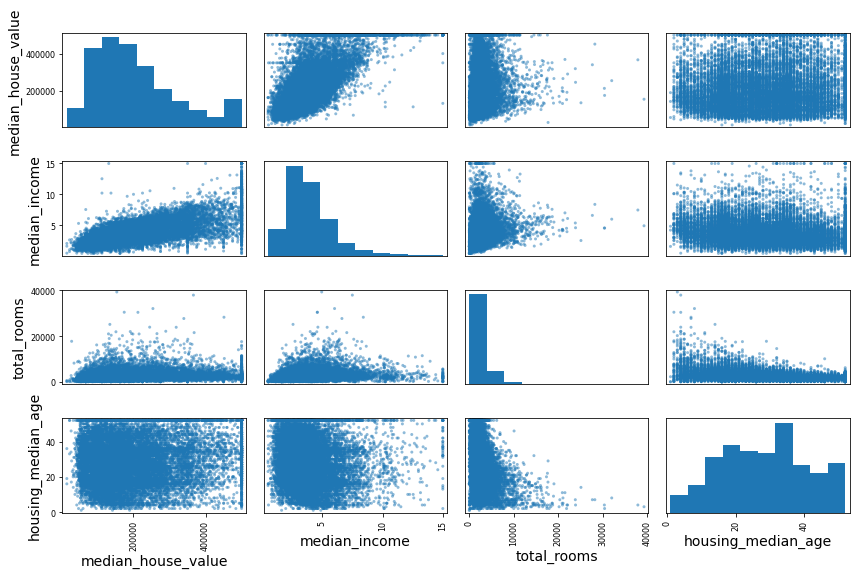

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

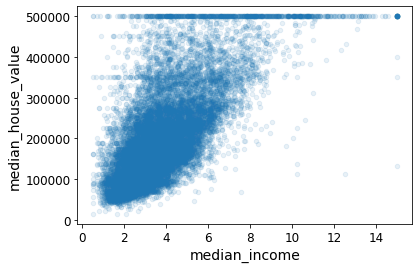

In [39]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

**2.4.3 특성 조합으로 실험**

In [40]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

       bedrooms_per_room  median_house_value
17606           0.223852            286600.0
18632           0.159057            340600.0
14650           0.241291            196900.0
3230            0.200866             46300.0
3555            0.231341            254500.0
...                  ...                 ...
6563            0.185681            240200.0
12053           0.245819            113000.0
13908           0.179609             97800.0
11159           0.193878            225900.0
15775           0.220355            500001.0

[16512 rows x 2 columns]


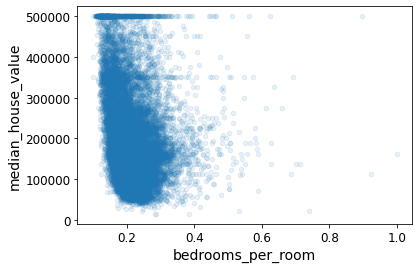

In [41]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# 침대/방 비율이 낮은 집이 더 비싼 경향
print(housing.loc[:, ['bedrooms_per_room', 'median_house_value']])
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.1)

#**2.5 머신러닝 알고리즘을 위한 데이터 준비**

In [42]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop은 복사본을 만들고 원본에 영향 없음
housing_labels = strat_train_set["median_house_value"].copy() 

**2.5.1 데이터 정제**

In [43]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)] # Null이 있는 열 검색
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,INLAND
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN


In [44]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1 해당 구역(행)을 제거

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [45]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2 특성을 제거 axis 0 : 행 제거 1 : 열 제거

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,1886.0,769.0,2.6036,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,1564.0,328.0,2.8347,INLAND
17198,-119.75,34.45,6.0,2864.0,1404.0,603.0,5.5073,NEAR OCEAN


In [46]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3 어떤 값으로 채움
sample_incomplete_rows

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,433.0,1886.0,769.0,2.6036,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,433.0,1564.0,328.0,2.8347,INLAND
17198,-119.75,34.45,6.0,2864.0,433.0,1404.0,603.0,5.5073,NEAR OCEAN


In [47]:
# SimpleImputer는 누락된 값을 쉽게 다룰수 있게 해줌
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [48]:
housing_num = housing.drop("ocean_proximity", axis=1) # 텍스트 특성인 ocean_proximity 제외한 복사본 생성 
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [49]:
imputer.fit(housing_num) # imputer 객체 학습

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [50]:
imputer.statistics_ # imputer는 각 특성의 중간값 결과를 statistics_ 속성에 저장 

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [51]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [52]:
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [53]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.loc[4629] # total_bedrooms이 중간값으로 채워짐        

longitude             -118.3000
latitude                34.0700
housing_median_age      18.0000
total_rooms           3759.0000
total_bedrooms         433.0000
population            3296.0000
households            1462.0000
median_income            2.2708
Name: 4629, dtype: float64

In [54]:
imputer.strategy

'median'

# 사이킷런 설계 철학

**1. 일관성**


**추정기(estimator)**
- 데이터셋을 기반으로 일편의 **모델 파라미터들을 추정**하는 객체(ex:imputer)
- fit() 메소드에 의해 수행
- 매개변수들은 하이퍼파라미터로 간주(ex: imputer.strategy) => 보통 생성자의 매개변수로 전달

**변환기(transformer)**
- **데이터셋을 변환**하는 추정기
- transform() 메소드에 의해 수행
- 학습된 파라미터에 의해 결정
- 모든 변환기는 fit_transform() 메소드도 가지고 있음

**예측기(predictor)**
- predict() 메소드에 의해 수행
- 예측의 품질을 측정하는 score() 메소드를 가짐
- 어느 예측기는 예측의 확산을 메소드도 제공(predict_proba(), decision_function())

**2. 검사가능**
- 모든 추정기 하이퍼파라미터는 공개 인스턴스 변수로 직접 접근 가능(ex : imputer.strategy)
- 학습된 파라미터도 접미사로 밑줄 붙여서 공개 인스턴스로 제공(ex : imputer.statistics_)

**3. 클래스 남용 방지** : 데이터셋을 넘파이 배열, 희소 행렬로 표현

**4. 조합성** : 변환기 여러개 연결 후 마지막에 추정기 하나를 배치한 pipeline

**5. 합리적인 기본값**

**2.5.2 텍스트와 범주형 특성 다루기**

In [55]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [56]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [57]:
ordinal_encoder.categories_ # 머신러닝이 가까이 있는 두 값이 떨어져 있는 두 값보다 더 비슷하다고 생각함
                            # 1H OCEAN, NEAR OCEAN 보다 1H OCEAN, INLAND가 더 비슷하다고 생각
                            # OnehotEncoding 사용

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
# 희소 행렬(sparse matrix) : 사이파이가 지원, 0이 아닌 원소 위치만 저장

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [59]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**2.5.3 나만의 변환기**

In [64]:
# 특성 조합을 위해 변환기를 만들어 사용 특성 조합을 위해 변환기를 만들어 사용
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음 # 초기화 메소드
        self.add_bedrooms_per_room = add_bedrooms_per_room # 추정기에 의해 파라미터로 제공

    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [65]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


**2.5.4 특성 스케일링**

**MinMaxScaler** : 0 ~ 1 정규화(최소값을 뺀 후 최대값과 최소값 차이로 나눔)

**StandarScaler** : 표준화(평균을 뺀 후 표준 편차로 나누어 분산이 1로 되게 함)
- 상한,하한이 없음
- 이상치에 영향을 덜 받음

**2.5.5 변환 파이프라인**

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('attr_adder', CombinedAttributesAdder()), # 그외에는 모두 변환기(fit_transform 가지고 있어야함, fit & transform으로도 가능)
                         ('std_scaler', StandardScaler()) # 마지막 단계에는 변환기, 추정기 모두 사용 가능
])

housing_num_tr = num_pipeline.fit_transform(housing_num) 
# 파이프라인의 fit() 메서드를 호출하면 모든 변환기의 fit_transform() 메서드를 순차적으로 호출하면서 
# 각 단계의 output을 다음 단계의 input으로 전달
# 마지막 단계에서는 fit() 메서드만 호출
# ex) pipeline.fit : fit & transform -> fit & transform -> fit

#파이프라인의 predict() 메서드를 호출하면 매개변수로 전달된 데이터가 각 단계의 transform()메서드를 통과
#마지막 단계에서는 추정기 객체가 변환된 데이터에 대한 예측 값을 반환
# ex) pipeline.predict : transform -> transform -> predict

# 파이프라인 객체는 마지막 추정기(StandardScaler)와 동일한 메소드를 제공(앞에서 사용한 fit_transform 메소드도 가짐)


In [ ]:
# ColumnTransformer은 수치형, 범주형을 하나의 파이프라인으로 변환할 수 있게 해줌
# full_pipeline = num_pipeline(수치형) + OnehotEncoder(범주형)